Spam words:
call      347
free      216
2         173
txt       150
u         147
ur        144
mobile    123
text      120
4         119
stop      113
Name: count, dtype: int64

Ham words:
u       972
im      449
2       305
get     303
ltgt    276
ok      272
dont    257
go      247
got     243
ur      240
Name: count, dtype: int64

Spam bi-grams:
please call         44
contact u           24
po box              24
å1000 cash          23
guaranteed call     23
prize guaranteed    22
every week          19
await collection    19
send stop           19
land line           18
Name: count, dtype: int64

Ham bi-grams:
gon na          58
ill call        47
call later      39
sorry ill       38
r u             37
u r             33
dont know       32
good morning    30
u wan           28
wan na          28
Name: count, dtype: int64

Spam tri-grams:
prize guaranteed call              21
land line claim                    14
2003 account statement             13
shows 800 unredeemed          

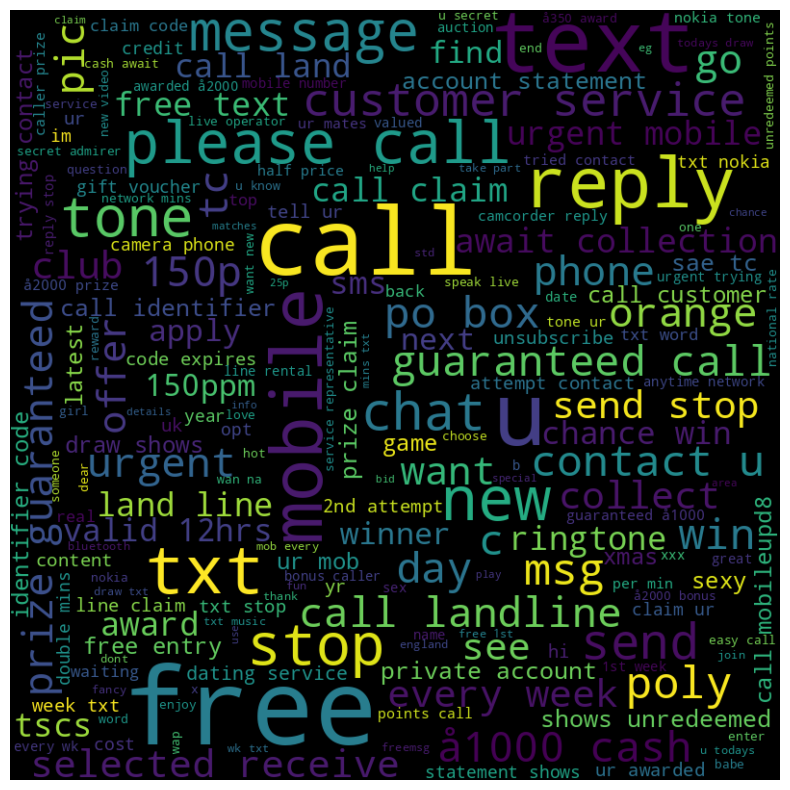

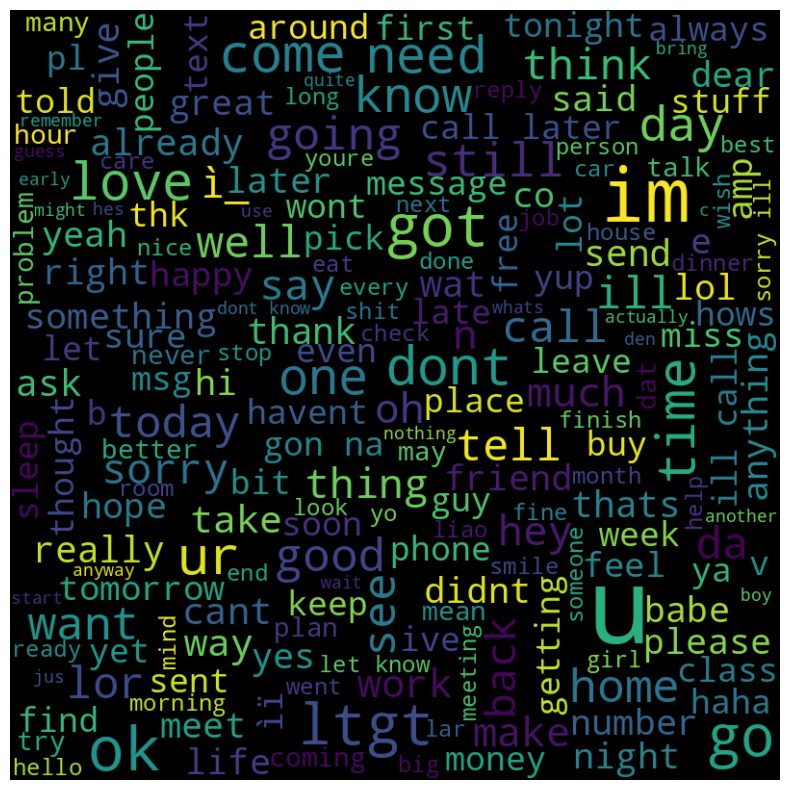

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load the dataset
df = pd.read_csv('spam.csv', encoding='latin-1')
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df = df.rename(columns={'v1': 'label', 'v2': 'text'})

def remove_punctuation(text):
    """Removes punctuation from a given text."""
    return re.sub(r'[^\w\s]', '', text)

# Apply punctuation removal to text column
df['text'] = df['text'].apply(remove_punctuation)

# Find the 10 most frequent words for each class
stop_words = set(stopwords.words('english'))

spam_words = [word for text in df[df['label'] == 'spam']['text'] for word in word_tokenize(text.lower()) if word not in stop_words]
ham_words = [word for text in df[df['label'] == 'ham']['text'] for word in word_tokenize(text.lower()) if word not in stop_words]

spam_word_freq = pd.Series(spam_words).value_counts().head(10)
ham_word_freq = pd.Series(ham_words).value_counts().head(10)

print("Spam words:")
print(spam_word_freq)
print("\nHam words:")
print(ham_word_freq)

# Find the 10 most frequent bi-grams for each class
spam_bigrams = [f"{word1} {word2}" for text in df[df['label'] == 'spam']['text'] for word1, word2 in zip(word_tokenize(text.lower())[:-1], word_tokenize(text.lower())[1:]) if word1 not in stop_words and word2 not in stop_words]
ham_bigrams = [f"{word1} {word2}" for text in df[df['label'] == 'ham']['text'] for word1, word2 in zip(word_tokenize(text.lower())[:-1], word_tokenize(text.lower())[1:]) if word1 not in stop_words and word2 not in stop_words]

spam_bigram_freq = pd.Series(spam_bigrams).value_counts().head(10)
ham_bigram_freq = pd.Series(ham_bigrams).value_counts().head(10)

print("\nSpam bi-grams:")
print(spam_bigram_freq)
print("\nHam bi-grams:")
print(ham_bigram_freq)

# Find the 10 most frequent tri-grams for each class
spam_trigrams = [' '.join(trigram) for text in df[df['label'] == 'spam']['text'] for trigram in zip(word_tokenize(text.lower()), word_tokenize(text.lower())[1:], word_tokenize(text.lower())[2:]) if trigram[0] not in stop_words and trigram[1] not in stop_words and trigram[2] not in stop_words]
ham_trigrams = [' '.join(trigram) for text in df[df['label'] == 'ham']['text'] for trigram in zip(word_tokenize(text.lower()), word_tokenize(text.lower())[1:], word_tokenize(text.lower())[2:]) if trigram[0] not in stop_words and trigram[1] not in stop_words and trigram[2] not in stop_words]

spam_trigram_freq = pd.Series(spam_trigrams).value_counts().head(10)
ham_trigram_freq = pd.Series(ham_trigrams).value_counts().head(10)

print("\nSpam tri-grams:")
print(spam_trigram_freq)
print("\nHam tri-grams:")
print(ham_trigram_freq)


# Create wordcloud for each class
wordcloud_spam = WordCloud(width=800, height=800, random_state=21, max_font_size=110).generate(' '.join(spam_words))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_spam, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud_ham = WordCloud(width=800, height=800, random_state=21, max_font_size=110).generate(' '.join(ham_words))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_ham, interpolation="bilinear")
plt.axis("off")
plt.show()

In [2]:
######### BAG OF WORDS #########

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

# Assuming you have a DataFrame named 'df' with a 'text' column

# Create a CountVectorizer object
vectorizer = CountVectorizer(stop_words='english')

# Fit the vectorizer to the entire dataset and transform the dataset
X_count = vectorizer.fit_transform(df['text'])

# Print the shape of the transformed dataset
print("Shape of the transformed dataset:", X_count.shape)

# Convert the sparse matrix to a dense matrix for further analysis (optional)
X_count_dense = X_count.toarray()

# Get the vocabulary
vocabulary = vectorizer.get_feature_names_out()

# Create a DataFrame for better visualization (optional)
# df_bow = pd.DataFrame(X_count_dense, columns=vocabulary)
# print(df_bow.head())


Shape of the transformed dataset: (5572, 9259)


In [3]:
########### ML MODEL WITH BAG OF WORDS ###########

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_count, df['label'], test_size=0.2, random_state=42)

# Create a Multinomial Naive Bayes classifier
clf = MultinomialNB()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate the F1-score
f1_bow = f1_score(y_test, y_pred, average='macro')

print("F1-score:", f1_bow)

F1-score: 0.9535203634999374


In [4]:
############## Convert text to vectors using Tf-IDF model ##################
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(df['text'])
y = df['label']

print("\nTf-IDF model:")
print(X_tfidf.shape)


Tf-IDF model:
(5572, 9259)


In [5]:
############## ML MODEL WITH TF-IDF ##################
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['label'], test_size=0.2, random_state=42)

# Create a Multinomial Naive Bayes classifier
clf = MultinomialNB()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate the F1-score
f1_tfidf = f1_score(y_test, y_pred, average='macro')

print("F1-score:", f1_tfidf)

F1-score: 0.9202526091150369


Spam words:
call      361
å         270
free      219
u         163
txt       150
ur        144
text      138
mobile    136
stop      116
claim     115
Name: count, dtype: int64

Ham words:
u       1043
im       451
get      318
ltgt     276
go       275
ok       272
dont     257
got      244
come     242
know     241
Name: count, dtype: int64

Spam bi-grams:
å prize             50
please call         46
å cash              45
po box              28
customer service    27
p per               25
contact u           24
call landline       23
guaranteed call     23
win å               22
Name: count, dtype: int64

Ham bi-grams:
gon na          58
call later      52
ill call        48
let know        41
sorry ill       39
r u             37
u r             37
dont know       32
good morning    31
new year        30
Name: count, dtype: int64

Spam tri-grams:
prize guaranteed call        21
å prize guaranteed           21
call land line               18
å cash å                     17
privat

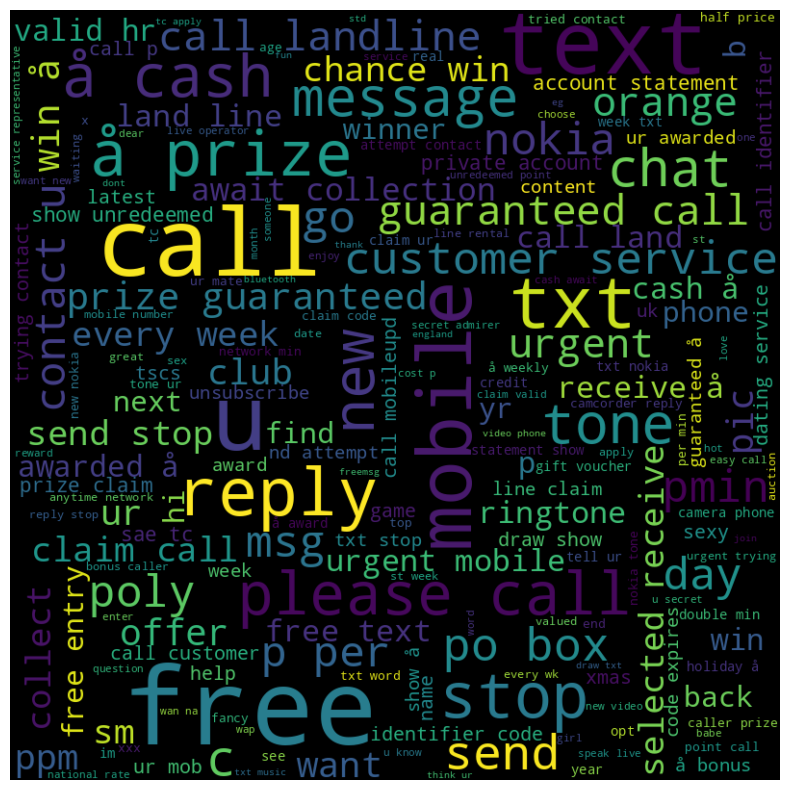

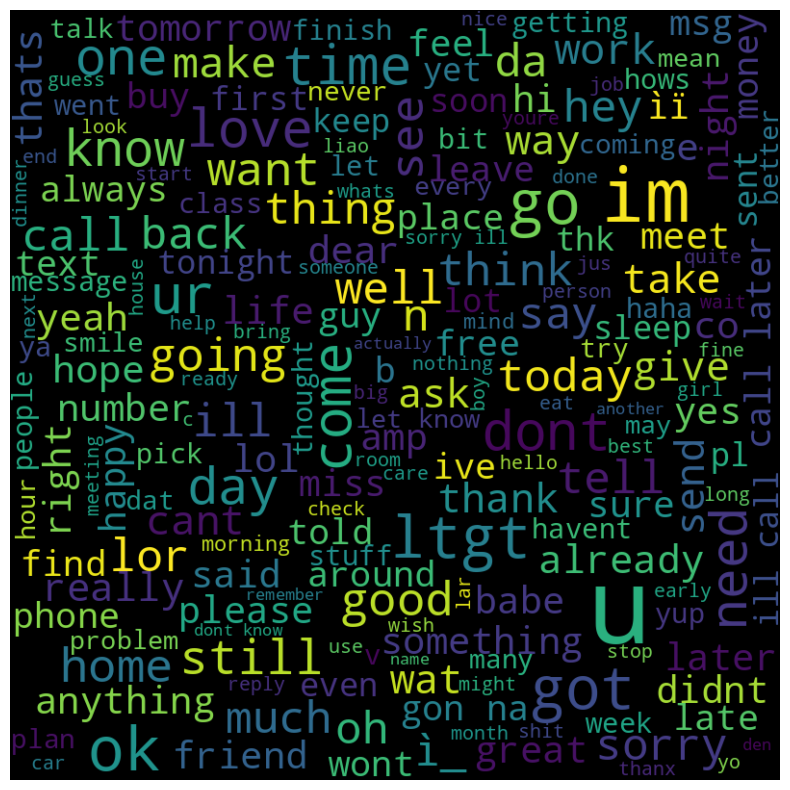

In [6]:
############## Preprocessing text data ##################

import pandas as pd
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Load the dataset
df1 = pd.read_csv('spam.csv', encoding='latin-1')
df1 = df1.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df1 = df1.rename(columns={'v1': 'label', 'v2': 'text'})

def remove_punctuation(text):
    """Removes punctuation from a given text."""
    return re.sub(r'[^\w\s]', '', text)

def remove_email_urls(text):
    """Removes email-ids and urls from a given text."""
    return re.sub(r'\b[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}\b', '', text)
def remove_html_tags(text):
    """Removes html tags from a given text."""
    return re.sub(r'<.*?>', '', text)

def preprocess_text(text):
    """Applies preprocessing steps to a given text."""
    text = remove_punctuation(text)
    text = remove_email_urls(text)
    text = remove_html_tags(text)
    text = re.sub(r'\d+', '', text)  # remove numbers
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

# Apply preprocessing to text column
df1['text'] = df1['text'].apply(preprocess_text)

# Find the 10 most frequent words for each class
spam_words = [word for text in df1[df1['label'] == 'spam']['text'] for word in text.split()]
ham_words = [word for text in df1[df1['label'] == 'ham']['text'] for word in text.split()]

spam_word_freq = pd.Series(spam_words).value_counts().head(10)
ham_word_freq = pd.Series(ham_words).value_counts().head(10)

print("Spam words:")
print(spam_word_freq)
print("\nHam words:")
print(ham_word_freq)

# Find the 10 most frequent bi-grams for each class
spam_bigrams = [f"{word1} {word2}" for text in df1[df1['label'] == 'spam']['text'] for word1, word2 in zip(text.split()[:-1], text.split()[1:])]
ham_bigrams = [f"{word1} {word2}" for text in df1[df1['label'] == 'ham']['text'] for word1, word2 in zip(text.split()[:-1], text.split()[1:])]

spam_bigram_freq = pd.Series(spam_bigrams).value_counts().head(10)
ham_bigram_freq = pd.Series(ham_bigrams).value_counts().head(10)

print("\nSpam bi-grams:")
print(spam_bigram_freq)
print("\nHam bi-grams:")
print(ham_bigram_freq)

# Find the 10 most frequent tri-grams for each class
spam_trigrams = [' '.join(trigram) for text in df1[df1['label'] == 'spam']['text'] for trigram in zip(text.split(), text.split()[1:], text.split()[2:])]
ham_trigrams = [' '.join(trigram) for text in df1[df1['label'] == 'ham']['text'] for trigram in zip(text.split(), text.split()[1:], text.split()[2:])]

spam_trigram_freq = pd.Series(spam_trigrams).value_counts().head(10)
ham_trigram_freq = pd.Series(ham_trigrams).value_counts().head(10)

print("\nSpam tri-grams:")
print(spam_trigram_freq)
print("\nHam tri-grams:")
print(ham_trigram_freq)

# Create wordcloud for each class
wordcloud_spam = WordCloud(width=800, height=800, random_state=21, max_font_size=110).generate(' '.join(spam_words))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_spam, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud_ham = WordCloud(width=800, height=800, random_state=21, max_font_size=110).generate(' '.join(ham_words))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_ham, interpolation="bilinear")
plt.axis("off")
plt.show()


In [7]:
# Convert text to vectors using Tf-IDF model
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf_text= vectorizer.fit_transform(df1['text'])
y = df1['label']

print("\nTf-IDF model:")
print(X_tfidf_text.shape)


Tf-IDF model:
(5572, 7764)


In [8]:
############## ML MODEL WITH TF-IDF with Text processing ##################
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_text, df1['label'], test_size=0.2, random_state=42)

# Create a Multinomial Naive Bayes classifier
clf = MultinomialNB()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate the F1-score
f1_tfidf_text = f1_score(y_test, y_pred, average='macro')

print("F1-score:", f1_tfidf_text)

F1-score: 0.9202526091150369


In [9]:
########### Scores of all models ###########
print("\nScores of all models:")
print("Bag of words:", f1_bow)
print("TF-IDF:", f1_tfidf)
print("TF-IDF with text processing:", f1_tfidf_text)


Scores of all models:
Bag of words: 0.9535203634999374
TF-IDF: 0.9202526091150369
TF-IDF with text processing: 0.9202526091150369
